Blibliotecas

In [37]:
import time
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle, islice
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, rand_score


# Distancia de Minkowski:
$$Minkowski(X,Y,p) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}$$


In [11]:
def minkowski(x, y, p):
    return np.sum(np.abs(x-y)** p)**(1/p)

# 2-aproximativo

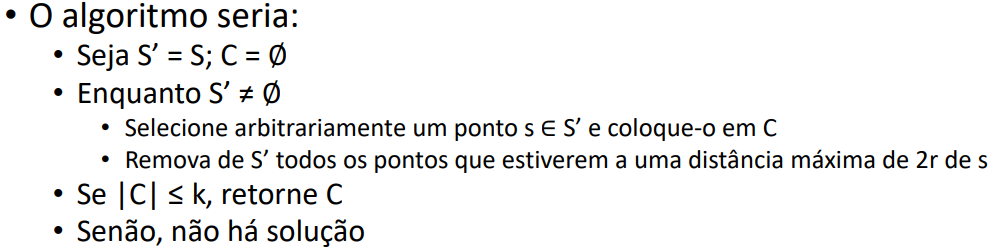


In [12]:
def two_approximation(S, k, r, p):
    S_copy = S.copy()
    C = []
    while len(S_copy) > 0:
        s = S_copy[0]
        C.append(s)
        S_copy = [point for point in S_copy if minkowski(point, s, p) > 2 * r]
    
    if len(C) <= k:
        return C
    else:
        return None

In [13]:
def refining_two_approximation(S, k, limit):
    dim = 1 if type(S[0]) == int else len(S[0])
    rmax =  np.max([minkowski(S[i], S[j], dim) for i in range(len(S)) for j in range(i+1,len(S))])
    low, high = 0, rmax
    low_v = [low]
    high_v = [high]
    while high - low > limit*rmax:
        mid = (high+low)//2
        C = two_approximation(S, k, mid, len(S[0]))
        if C is not None:
            high = mid -1
        else:
            low = mid + 1
        high_v.append(high)
        low_v.append(low)
    return C, high_v, low_v
    

# 

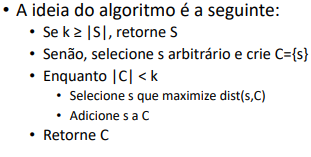

In [14]:
def distance_matrix(points, p=2):
    n = len(points)
    dist_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i, n):
            dist = minkowski(points[i], points[j], p)
            dist_matrix[i][j] = dist
            dist_matrix[j][i] = dist
    
    return dist_matrix

In [15]:
def max_dist_point(dist_matrix, centers_indices):
    max_dist = -1
    max_index = None
    for i in range(len(dist_matrix)):
        if i not in centers_indices:
            min_dist = min(dist_matrix[i][j] for j in centers_indices)
            if min_dist > max_dist:
                max_dist = min_dist
                max_index = i
    return max_index

In [16]:
def k_centers_max_dist(points, k,dist_matrix):
    n = len(points)
    if k >= n:
        return points

    centers_indices = [np.random.choice(n)]

    while len(centers_indices) < k:
        new_center_index = max_dist_point(dist_matrix, centers_indices)
        centers_indices.append(new_center_index)

    centers = [points[i] for i in centers_indices]
    return np.vstack(centers)

In [17]:
def predict_points(points, centers):
    labels = []
    for p in points:
        dist = list(map(lambda x: minkowski(p,x,p=2),centers))
        idx = dist.index(min(dist))
        labels.append(idx)
    return np.vstack(labels)

In [34]:
def plot_clusters(data, pred_centers, true_centers, duration):
    labels = predict_points(data, pred_centers)
    label_uni = np.reshape(labels, (1,len(labels)))[0]

    colors = np.array(
                list(
                    islice(
                        cycle(
                            [
                                "#377eb8",
                                "#ff7f00",
                                "#4daf4a",
                                "#f781bf",
                                "#a65628",
                                "#984ea3",
                                "#999999",
                                "#e41a1c",
                                "#dede00",
                            ]
                        ),
                        int(max(label_uni) + 1),
                    )
                )
            )
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], s=10, alpha=0.7, label='Data', c=colors[label_uni])
    plt.scatter(pred_centers[:, 0], pred_centers[:, 1], color='red', marker='.', s=100, label='Centros Previstos')
    if true_centers is not None:
        plt.scatter(true_centers[:, 0], true_centers[:, 1], color='yellow', marker='.', s=100, label='Centros dos Clusters')
    plt.text(
        0.99,
        0.01,
        ("%.2fs" % (duration)).lstrip("0"),
        transform=plt.gca().transAxes,
        size=15,
        horizontalalignment="right",
    )
    plt.legend()
    plt.show()

Lembrar de Gerar a matriz de distancias antes de rodar

In [21]:
from data_generator_script import generate_synthetic_data, generate_scikit_synthetic_data

<H2> 2-Aproximativo Maximiza Distância

<H3> Dado Sintético Scikit

In [ ]:
datasets = generate_scikit_synthetic_data()
k_data = [2, 2, 3, 4, 3, 3, 3, 3, 3]
for i, (X, y) in enumerate(datasets):
     X = StandardScaler().fit_transform(X)
     dist_mat = distance_matrix(X)
     centers =  k_centers_max_dist(X, k_data[i], dist_mat)
     
     plt.scatter(X[:,0], X[:,1], s=10)
     plt.scatter(centers[:,0], centers[:,1], color='red', s=100, marker='.')
     plt.show()

<H3> Dado Sintético Gerado

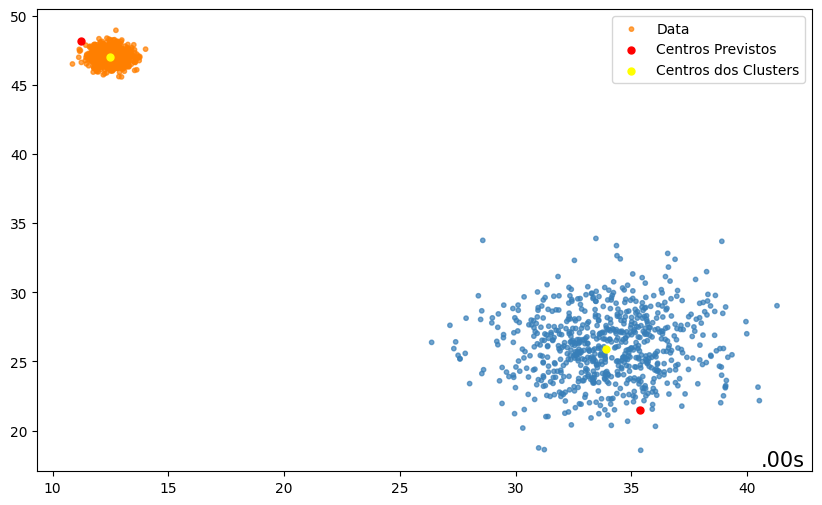

AVG Time: 0.0011769851048787435 ------------- AVG Rand Score: 1.0 ------------- AVG Silhouette: 0.9130154661693235


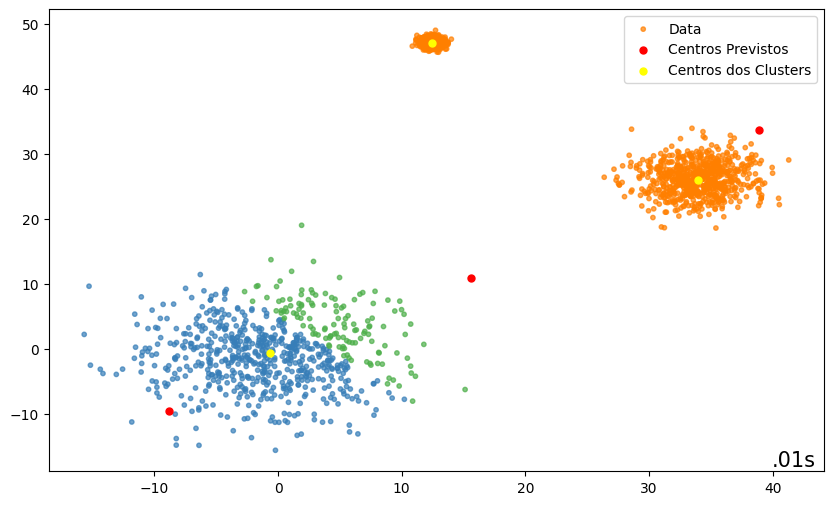

AVG Time: 0.006038228670756022 ------------- AVG Rand Score: 0.9448018330724381 ------------- AVG Silhouette: 0.782819548023671


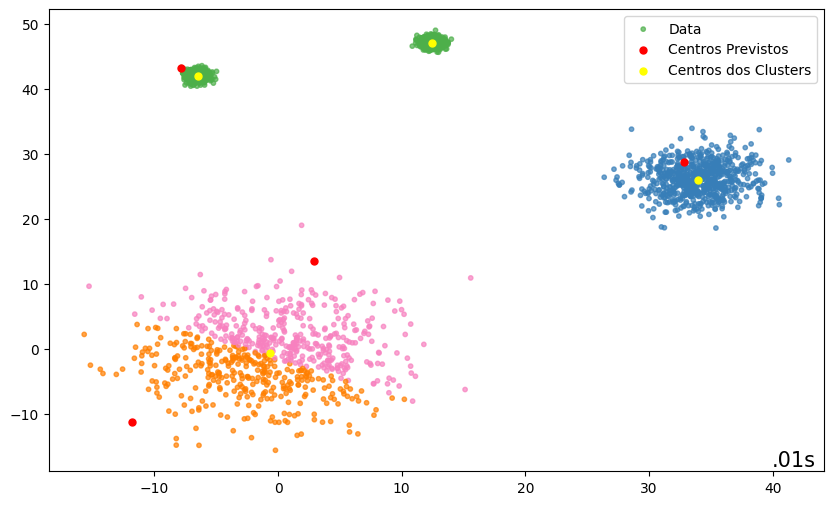

AVG Time: 0.012813258171081542 ------------- AVG Rand Score: 0.8586332703856818 ------------- AVG Silhouette: 0.6589389507458726


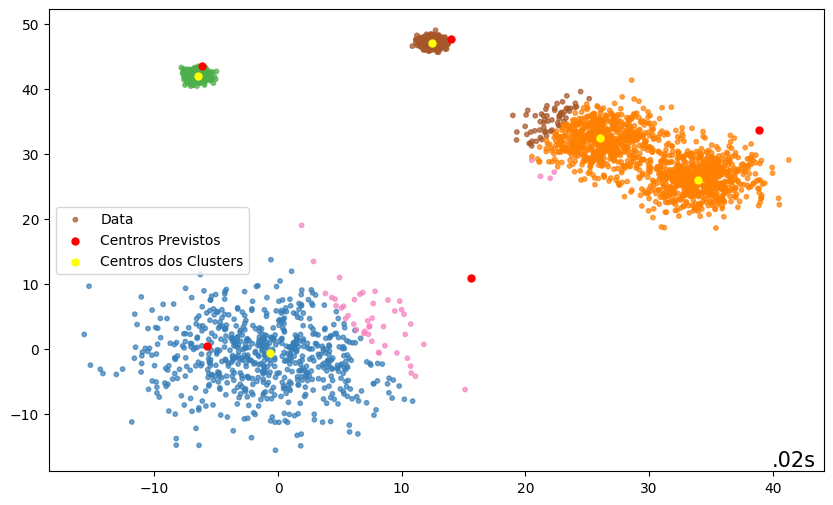

AVG Time: 0.020712248484293618 ------------- AVG Rand Score: 0.8087439894391596 ------------- AVG Silhouette: 0.5904643604893419


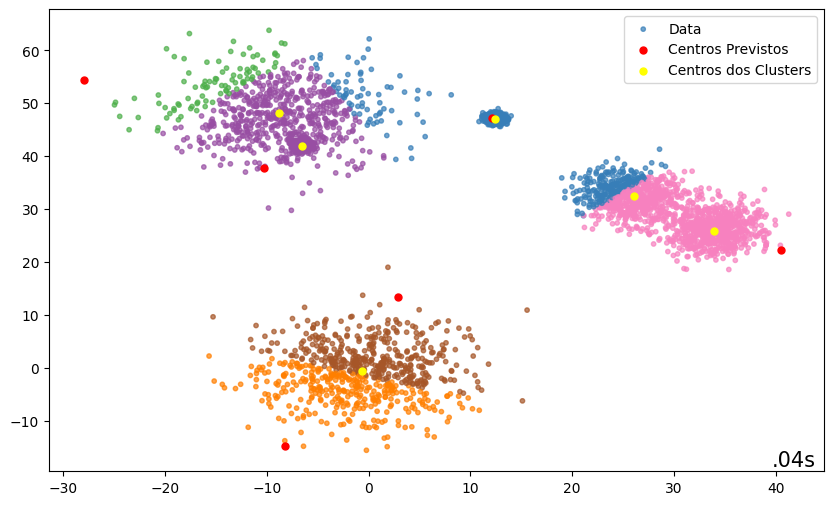

AVG Time: 0.05119515260060628 ------------- AVG Rand Score: 0.8424351981008328 ------------- AVG Silhouette: 0.4886857932729651


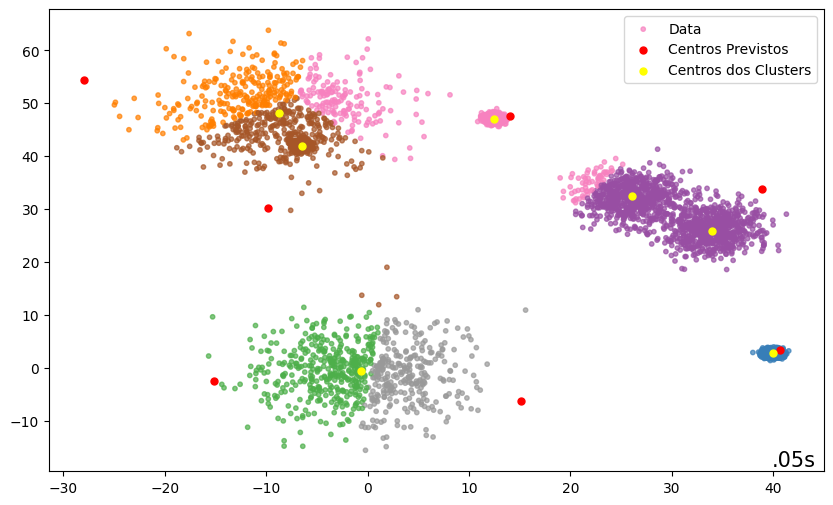

AVG Time: 0.06461285750071208 ------------- AVG Rand Score: 0.8891898665977924 ------------- AVG Silhouette: 0.5523889641626842


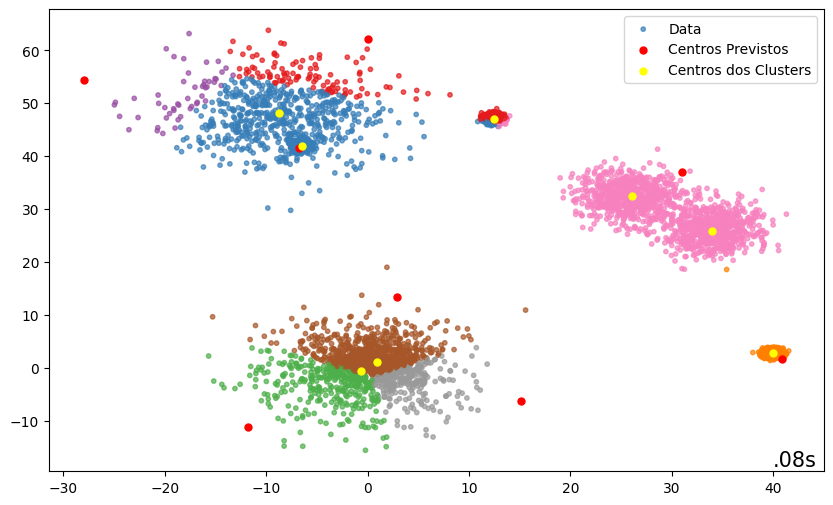

AVG Time: 0.08739660580952963 ------------- AVG Rand Score: 0.9148769508160471 ------------- AVG Silhouette: 0.5592897585582486


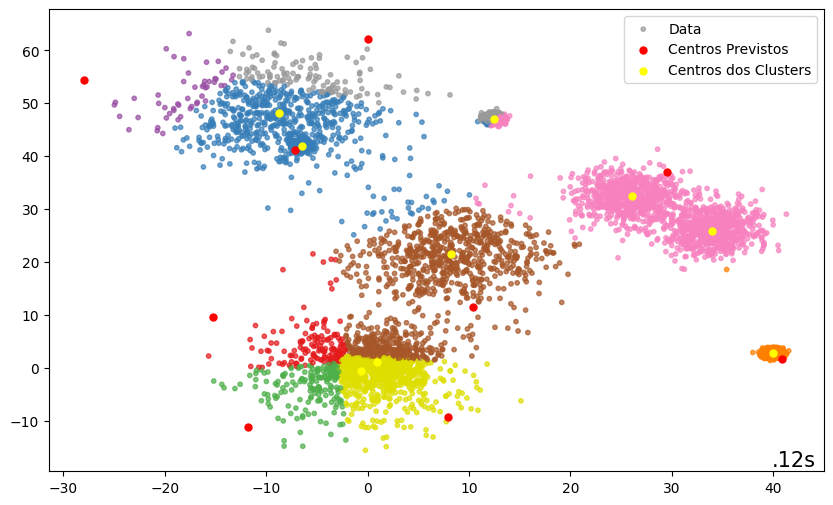

AVG Time: 0.11274276574452718 ------------- AVG Rand Score: 0.9142578388607918 ------------- AVG Silhouette: 0.4533763615307685


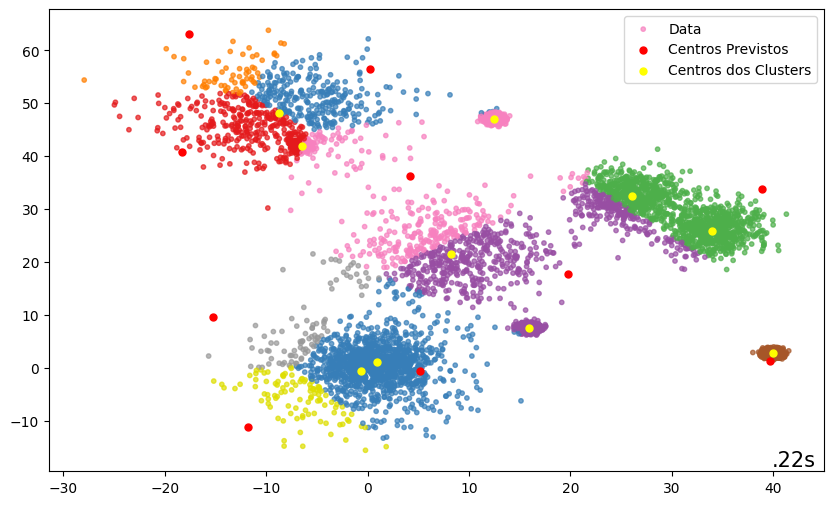

AVG Time: 0.20227396488189697 ------------- AVG Rand Score: 0.9227375108008626 ------------- AVG Silhouette: 0.4582063509978653


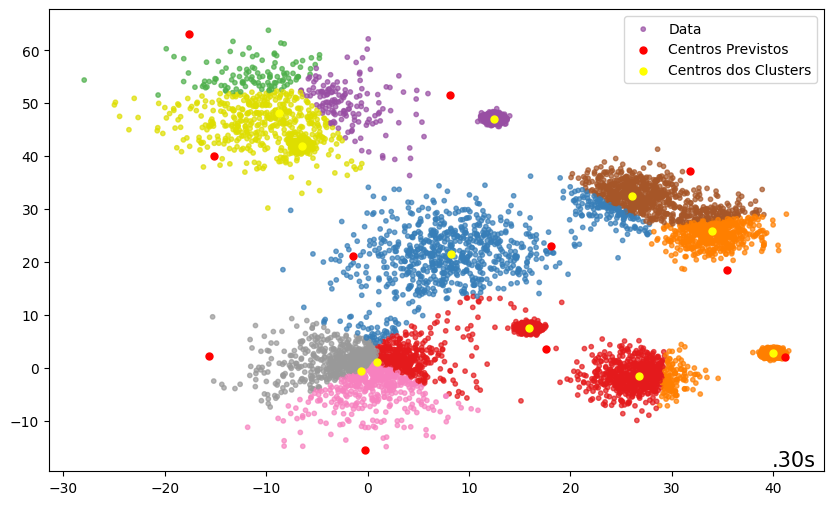

AVG Time: 0.26965182622273765 ------------- AVG Rand Score: 0.9242171418225452 ------------- AVG Silhouette: 0.4321810365962541


In [41]:
k_data = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
datasets = generate_synthetic_data(k_data, 700, [0.5, 2.5, 5])
duration = []
average_time =[]
avg_rand_score = []
avg_silhouette_score = []
for i, (data, true_labels, true_centers) in enumerate(datasets):
      dist_mat = distance_matrix(data)
      tempo = 0
      silh_score = 0
      rand_scr = 0
      for j in range(30):
            t0 = time.time()
            centers =  k_centers_max_dist(data, k_data[i], dist_mat)
            t1 = time.time()
            duration = (t1 - t0)
            tempo += t1- t0
            y_pred = predict_points(data, centers)
            y_pred = np.reshape(y_pred, (1,len(y_pred)))[0]
            
            y_true = predict_points(data, true_centers)
            y_true = np.reshape(y_true, (1,len(y_true)))[0]
            
            silh_score += silhouette_score(data, y_pred)
            rand_scr += rand_score(y_true, y_pred)
            
      average_time.append(tempo/30)
      avg_rand_score.append(rand_scr/30)
      avg_silhouette_score.append(silh_score/30)
      plot_clusters(data, centers, true_centers, duration)
      print(f"AVG Time: {tempo/30} ------------- AVG Rand Score: {rand_scr/30} ------------- AVG Silhouette: {silh_score/30}")

In [43]:
average_time, avg_rand_score, avg_silhouette_score

([0.0011769851048787435,
  0.006038228670756022,
  0.012813258171081542,
  0.020712248484293618,
  0.05119515260060628,
  0.06461285750071208,
  0.08739660580952963,
  0.11274276574452718,
  0.20227396488189697,
  0.26965182622273765],
 [1.0,
  np.float64(0.9448018330724381),
  np.float64(0.8586332703856818),
  np.float64(0.8087439894391596),
  np.float64(0.8424351981008328),
  np.float64(0.8891898665977924),
  np.float64(0.9148769508160471),
  np.float64(0.9142578388607918),
  np.float64(0.9227375108008626),
  np.float64(0.9242171418225452)],
 [np.float64(0.9130154661693235),
  np.float64(0.782819548023671),
  np.float64(0.6589389507458726),
  np.float64(0.5904643604893419),
  np.float64(0.4886857932729651),
  np.float64(0.5523889641626842),
  np.float64(0.5592897585582486),
  np.float64(0.4533763615307685),
  np.float64(0.4582063509978653),
  np.float64(0.4321810365962541)])